<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/moduleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction to Linear Algebra


Linear algebra is a branch of mathematics that deals with vector spaces, matrices, and linear transformations. It forms the foundation for many advanced topics and practical applications in data science, machine learning, computer graphics, engineering, and more.


- **Data Representation:**  
  Data points in many fields (like data science) are often represented as vectors. Understanding how to manipulate vectors is essential for analyzing and processing data.

- **Matrix Operations:**  
  Matrices are used to represent datasets and perform transformations. Operations such as matrix multiplication, inversion, and decomposition are crucial in solving systems of equations, performing linear regression.

- **Algorithmic Foundations:**  
  Many machine learning algorithms (including neural networks, support vector machines, and clustering methods) are built upon principles of linear algebra.

Vector v1: [2 3]
Vector v2: [ 4 -1]
Sum of v1 and v2: [6 2]
Dot product of v1 and v2: 5


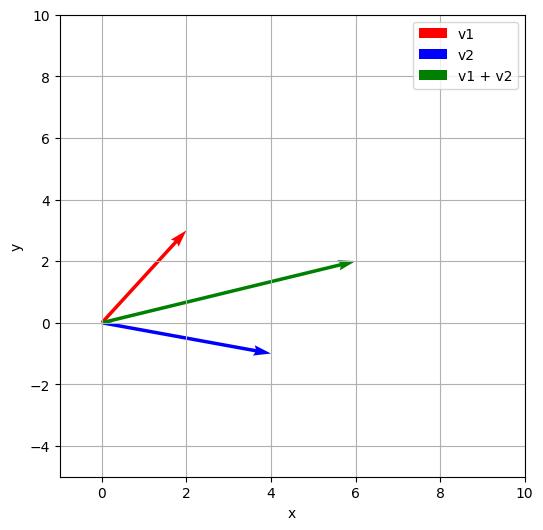

In [2]:
import numpy as np
import matplotlib.pyplot as plt

v1 = np.array([2, 3])
v2 = np.array([4, -1])

v_sum = v1 + v2

dot_product = np.dot(v1, v2)

print("Vector v1:", v1)
print("Vector v2:", v2)
print("Sum of v1 and v2:", v_sum)
print("Dot product of v1 and v2:", dot_product)

origin = np.array([0, 0])  # Origin for the vectors

plt.figure(figsize=(6,6))
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.quiver(*origin, *v_sum, angles='xy', scale_units='xy', scale=1, color='g', label='v1 + v2')

plt.xlim(-1, 10)
plt.ylim(-5, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()




---



# 1.2 Elements of Linear Algebra


- **Linear Spaces and Subspaces:**  
  A linear subspace of a vector space is a subset that is closed under vector addition and scalar multiplication. For example, the span of a set of vectors is always a linear subspace.

- **Linear Combinations:**  
  A linear combination is formed by multiplying vectors by scalars and adding them together. The **span** of a set of vectors is the collection of all possible linear combinations.

- **Linear Independence and Basis:**  
  A set of vectors is **linearly independent** if no vector in the set can be written as a linear combination of the others. A **basis** for a vector space is a linearly independent set of vectors that spans the entire space. All bases of a given vector space have the same number of elements, which is the dimension of the space.

- **Column Space:**  
  In the context of matrices, the column space is the span of the matrix's columns. It is a key example of a linear subspace in R^n.

- **Eigenvalues and Eigenvectors:**
  For a square matrix A, an eigenvalue λ and a nonzero eigenvector x satisfy the equation Ax=λx.

  Eigenvalues represent the scaling factors by which the transformation A stretches or compresses its eigenvectors, which indicate the directions of these invariant transformations.

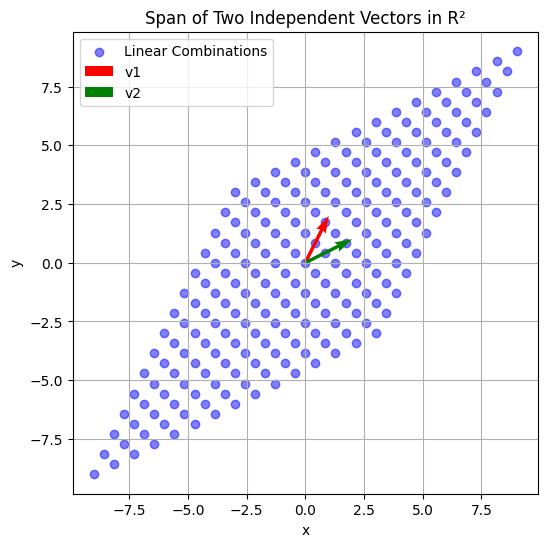

In [3]:
import numpy as np
import matplotlib.pyplot as plt

v1 = np.array([1, 2])
v2 = np.array([2, 1])

a_vals = np.linspace(-3, 3, 15)
b_vals = np.linspace(-3, 3, 15)
points = np.array([a*v1 + b*v2 for a in a_vals for b in b_vals])

plt.figure(figsize=(6,6))
plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.5, label='Linear Combinations')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label='v2')
plt.title('Span of Two Independent Vectors in R²')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()




---



# 1.3 Linear Regression

- **QR Decomposition:**
  - A method to factor a matrix A into two matrices, Q and R.
  - Q is an orthonormal matrix and R is an upper triangular matrix.
  - This factorization can be used to solve least-squares problems efficiently.

- **Least-squares Problems:**
  - The goal is to find x that minimizes the squared error norm ||A*x - b||.
  - This is useful when the system A*x = b is overdetermined (more equations than unknowns).
  - One common approach is to compute the QR decomposition of A, then solve R*x = Q^T*b.

- **Linear Regression:**
  - In linear regression, we fit a model of the form y = beta0 + beta1*x1 + ... + betad*xd.
  - The design matrix A is built with a column of ones (for the intercept) and the input features.
  - The regression coefficients (beta values) are determined by solving the least-squares problem.


Estimated coefficients: [2.84637052 2.85883775]


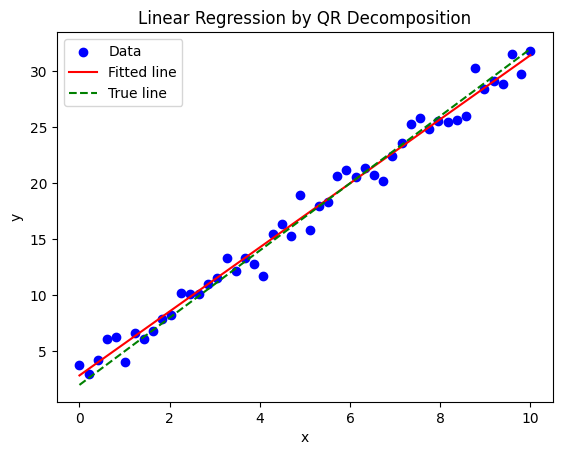

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(0, 10, 50)

y_true = 2 + 3 * x

y = y_true + np.random.randn(50)

A = np.column_stack((np.ones_like(x), x))

Q, R = np.linalg.qr(A)

beta = np.linalg.solve(R, Q.T.dot(y))

print("Estimated coefficients:", beta)

plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, A.dot(beta), label='Fitted line', color='red')
plt.plot(x, y_true, label='True line', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression by QR Decomposition')
plt.legend()
plt.show()
